In [47]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

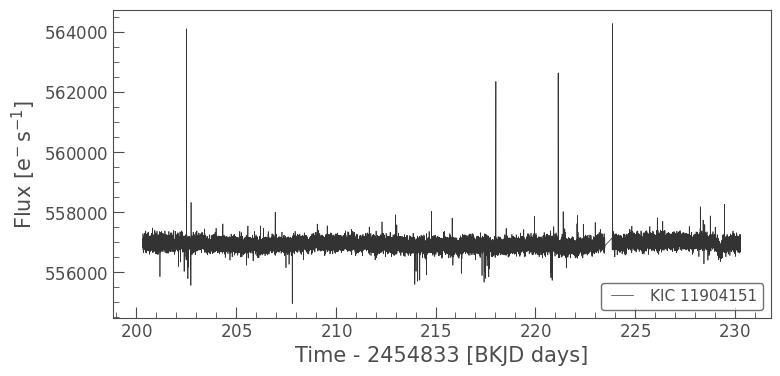

In [48]:
search_result = lk.search_lightcurve(target="Kepler-10")
lc = search_result[0].download()
lc.plot()
plt.show()

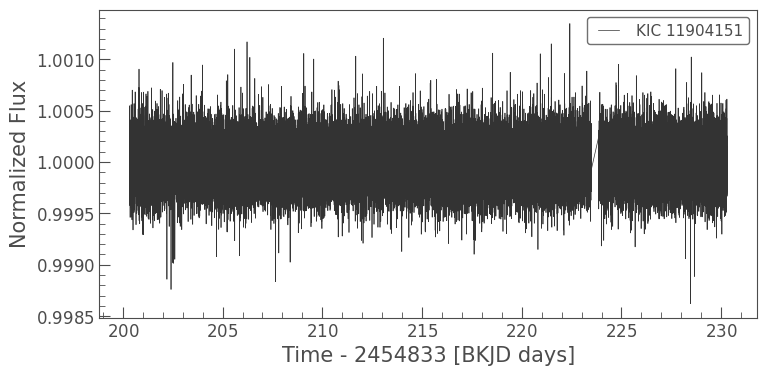

In [49]:
# This one line does all the heavy lifting! That's it so easy isn't it ?
cleaned_lc = lc.remove_outliers().flatten()

# Now, let's plot the result
cleaned_lc.plot()
plt.show()

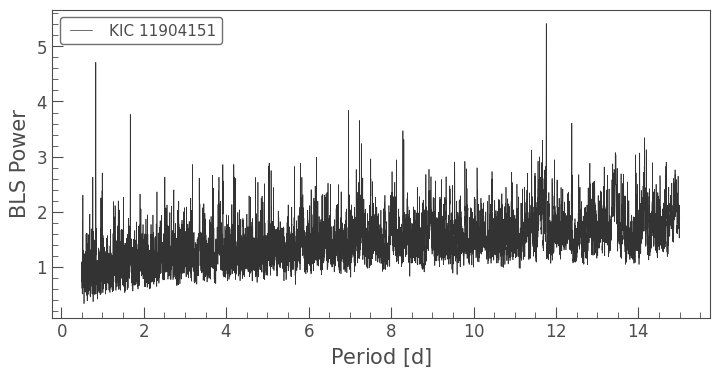

In [50]:
# Search for signals with periods between 0.5 and 15 days
periods = np.linspace(0.5, 15, 10000)
bls = cleaned_lc.to_periodogram(method="bls", period=periods, duration=[0.05, 0.2])

# Plot the results
bls.plot()
plt.show()

`period` contains 202711 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


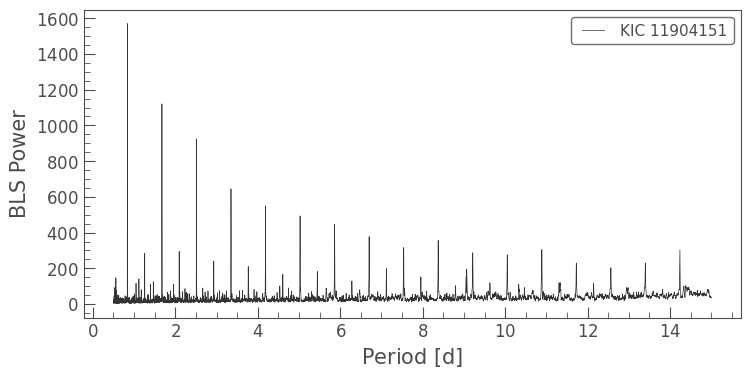

In [ ]:
# The key change: I'm now downloading 5 chunks of data, not just one.
lc_collection = search_result[0:5].download_all()

# I then stitch them together into one long light curve before cleaning.
lc_stitched = lc_collection.stitch().remove_outliers()

# Finally, I apply the same smart flattening method as before.
cadence = np.median(np.diff(lc_stitched.time.value))
window_length = int(1 / cadence)
lc_clean = lc_stitched.flatten(window_length=window_length)

periods = np.linspace(0.5, 15, 10000)
bls_periodogram = lc_clean.to_periodogram(method="bls", period=periods, duration=[0.05, 0.2])
bls_periodogram.plot()
plt.show()

In [53]:
best_fit_period = bls_periodogram.period_at_max_power
print(f"The strongest signal found is at a period of: {best_fit_period:.4f} days")

The strongest signal found is at a period of: 0.8379 d days


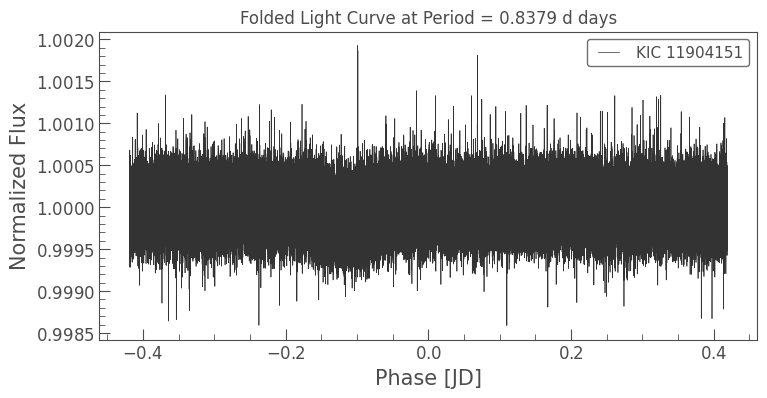

In [52]:
best_fit_period = bls_periodogram.period_at_max_power
folded_lc = lc_clean.fold(period=best_fit_period)

# And plot the result
ax = folded_lc.plot()
ax.set_title(f"Folded Light Curve at Period = {best_fit_period:.4f} days")
plt.show()